🧬 💵 Let's read salary data for biotech careers from [this public spreadsheet](https://docs.google.com/spreadsheets/d/1G0FmJhkOME_sv66hWmhnZS5qR2KMTY7nzkxksv46bfk).

First, load the `googlesheets4` package.

In [2]:
library('googlesheets4')
library('tidyverse')

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.5     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.0.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [4]:
gs4_deauth()

📈 Make a chart that shows the relationship between `Years of Experience` and `Compensation - Annual Base Salary/Pay`.

❗️ Remember that you need to use backticks to access columns whose names have spaces:

```
`Years of Experience`
```

In [6]:
salary_data = read_sheet('https://docs.google.com/spreadsheets/d/1G0FmJhkOME_sv66hWmhnZS5qR2KMTY7nzkxksv46bfk/edit#gid=203339396')
#or just use the sheet id in the middle of url

✔ Reading from "salary survey test (Responses)".

✔ Range Form Responses 1.



In [7]:
salary_data |> head()

Timestamp,Where are you located? (Country and/or nearest Major city or hubs names),Biotech sub industry?,[OPTIONAL] Company Name,Company Details - public/private/start-up/ subsidiary of,Approximate Company Size,Role / Title of current position,Highest achieved Formal Education,Years of Experience,Compensation - Annual Base Salary/Pay,Compensation - Annual Target Bonus ($),Compensation - Annual Equity,[OPTIONAL] Sign on Bonus Value,[OPTIONAL] Sign on - Relocation Assistance Total Value
<dttm>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<list>,<list>,<dbl>,<list>
2022-05-08 00:17:11,test,Academia/Research,poop,Subsidiary,NA,pimp,High School or Equivalent,1,123,123,Not Applicable/None,123,12e
2022-05-08 00:38:17,Los Angeles,Consulting,NA,Private,50-200,Senior Manager,Masters or Equivalent,6,160000,16000,30000,10000,NULL
2022-05-08 00:39:38,San Diego,Pharmaceutical (including “big pharma”),NA,Public,50-200,Research Associate I,Bachelors or Equivalent,0,55000,4400,Not Applicable/None,NA,NULL
2022-05-08 00:40:46,Illinois,Academia/Research,NA,Academia/College/Universities,5000+,Researcher 1,Bachelors or Equivalent,2,28000,Not Applicable/None,Not Applicable/None,NA,NULL
2022-05-08 00:40:48,New Jersey,Pharmaceutical (including “big pharma”),Wuxi Biologics,Public,1000-5000,Manufacturing technician III,Bachelors or Equivalent,6,72800,5824,Not Applicable/None,NA,NULL
2022-05-08 00:42:01,Near boston,Pharmaceutical (including “big pharma”),Abbvie,Public,5000+,Senior scientist I,PhD or Equivalent,0,120000,0.08,Not Applicable/None,7000,15000


`geom_smooth()` using method = 'loess' and formula 'y ~ x'



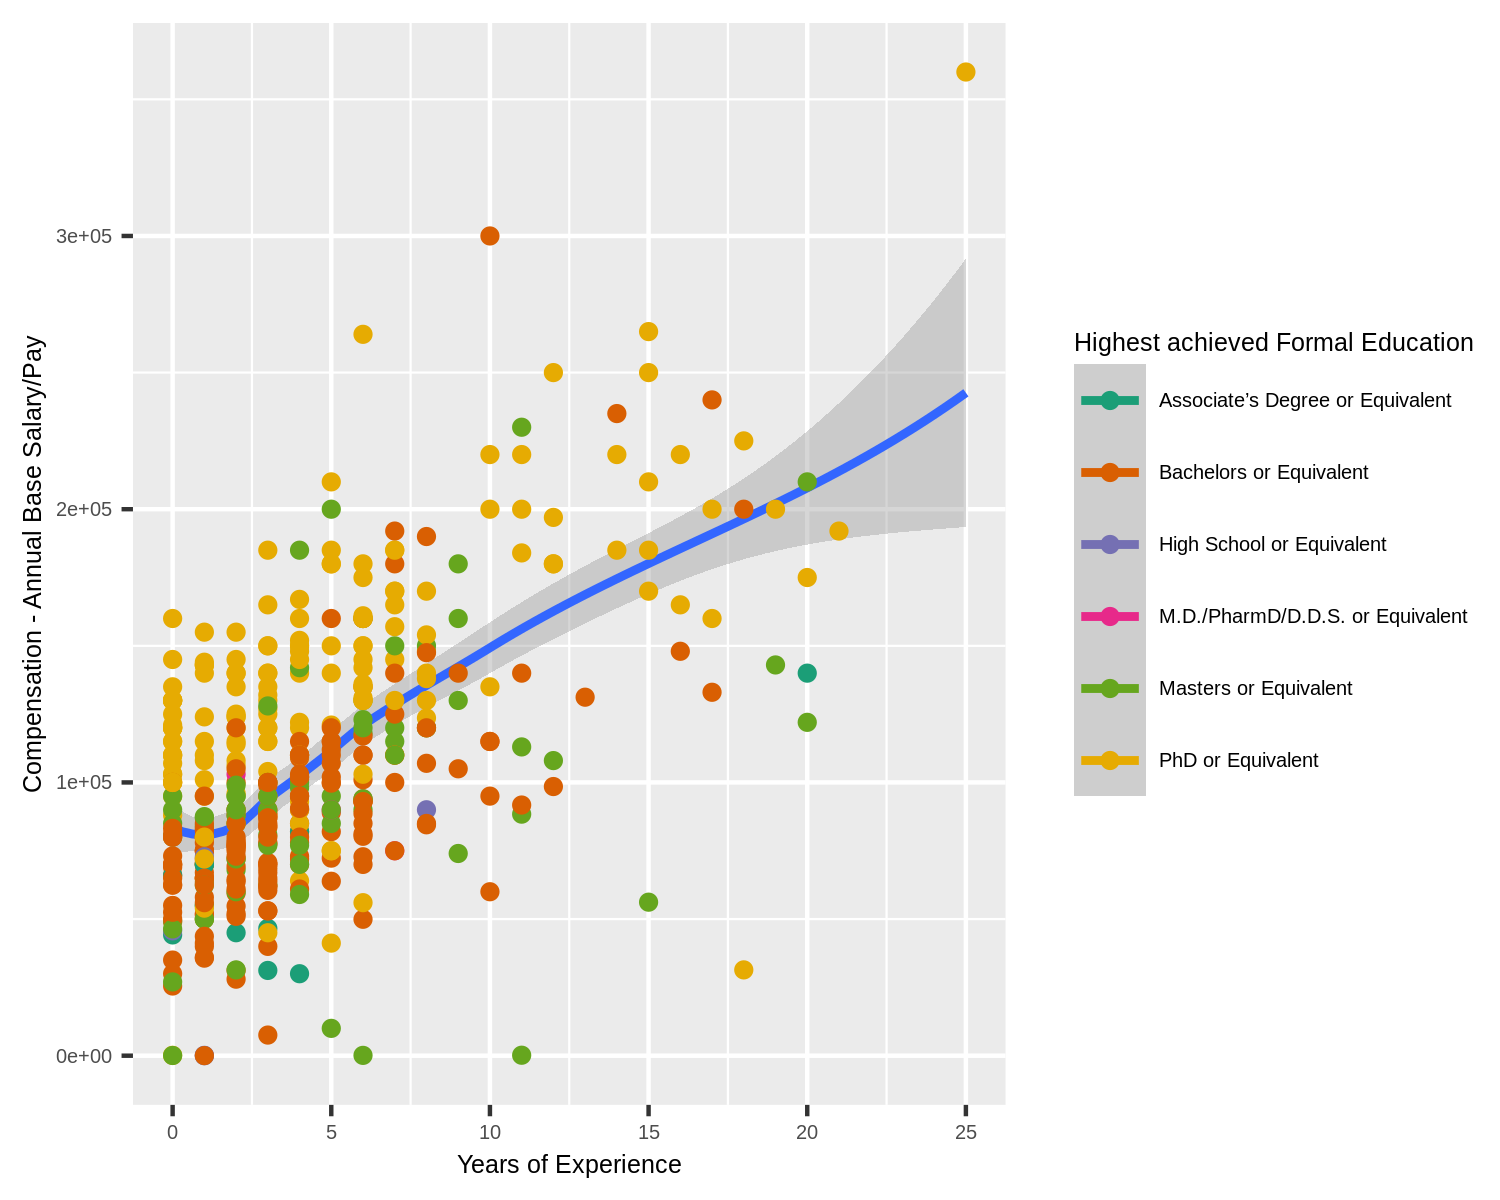

In [18]:
p = ggplot(salary_data, aes(x = `Years of Experience`, 
                            y = `Compensation - Annual Base Salary/Pay`, 
                            color = `Highest achieved Formal Education`)) +
    geom_smooth(aes(group = 1)) + #don't group the color when doing geom_smooth
    geom_point() + 
    scale_color_brewer(palette = 'Dark2') + 
    theme(text = element_text(size = 6))
p

📊 Count the number of respondents that belong to each `Highest achieved Formal Education` category. You can do this visually with `geom_bar` or in table form with `dplyr`...

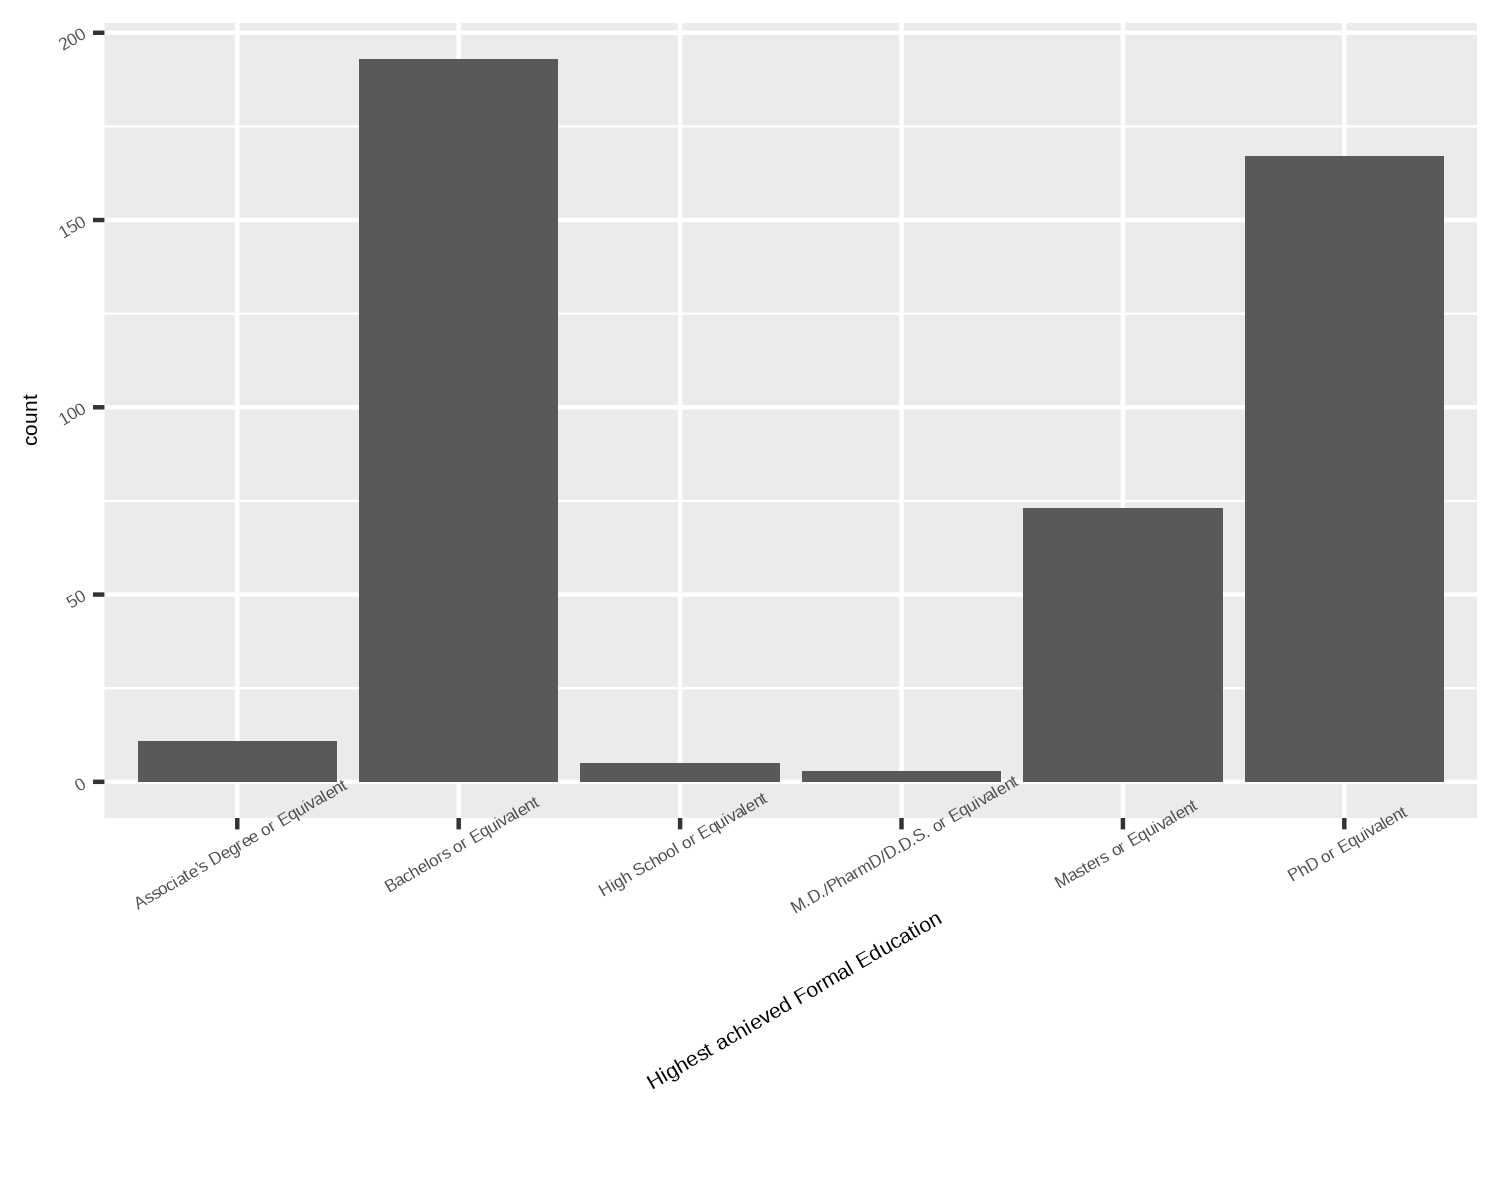

In [24]:
p = ggplot(salary_data, aes(x = `Highest achieved Formal Education`)) + geom_bar() +
    theme(text = element_text(size = 5, angle = 30))
p

In [25]:
salary_data |> 
    group_by(`Highest achieved Formal Education`) |>
    summarize(count = n()) |> head()

Highest achieved Formal Education,count
<chr>,<int>
Associate’s Degree or Equivalent,11
Bachelors or Equivalent,193
High School or Equivalent,5
M.D./PharmD/D.D.S. or Equivalent,3
Masters or Equivalent,73
PhD or Equivalent,167


📊 Make a histogram of `Compensation - Annual Base Salary/Pay` for respondents in the `Bachelors or Equivalent` group from the `Highest achieved Formal Education` column.,

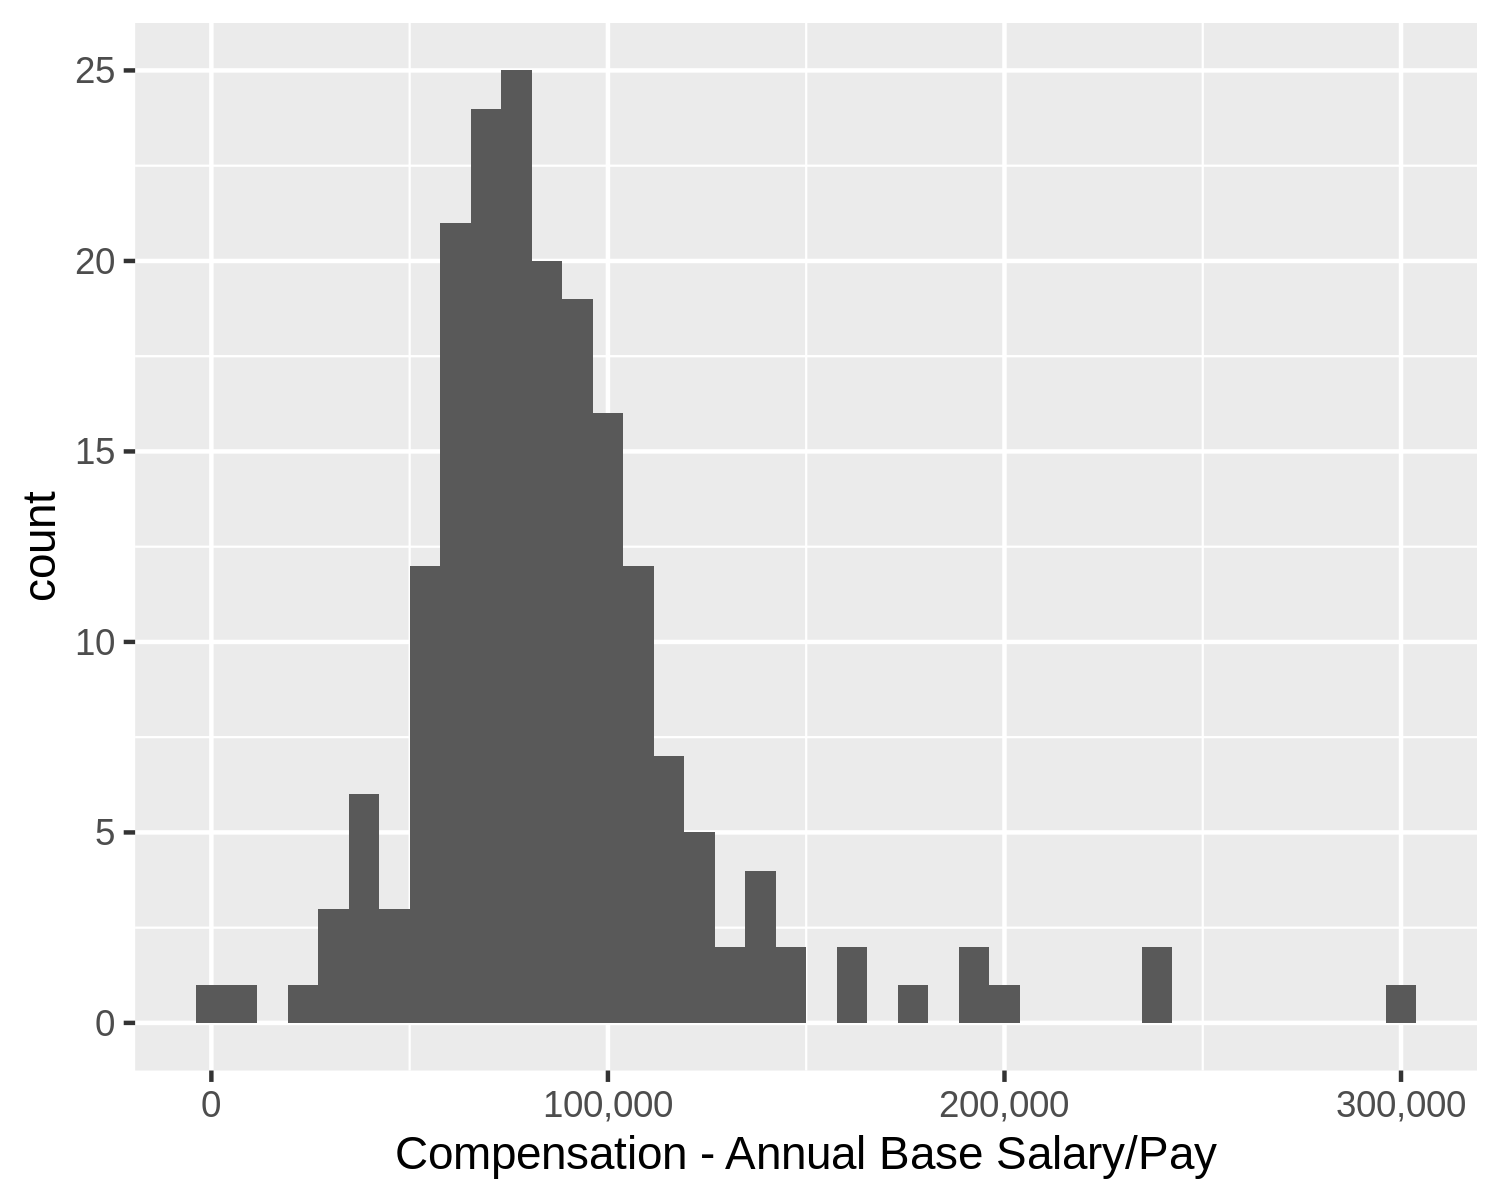

In [32]:
p = ggplot(salary_data |> filter(`Highest achieved Formal Education` == 'Bachelors or Equivalent'),
           aes(x = `Compensation - Annual Base Salary/Pay`)) + 
    geom_histogram(bins=40) + 
    scale_x_continuous(labels = scales::comma_format())
p

In [33]:
salary_data |> filter(`Compensation - Annual Base Salary/Pay` < 1000)

Timestamp,Where are you located? (Country and/or nearest Major city or hubs names),Biotech sub industry?,[OPTIONAL] Company Name,Company Details - public/private/start-up/ subsidiary of,Approximate Company Size,Role / Title of current position,Highest achieved Formal Education,Years of Experience,Compensation - Annual Base Salary/Pay,Compensation - Annual Target Bonus ($),Compensation - Annual Equity,[OPTIONAL] Sign on Bonus Value,[OPTIONAL] Sign on - Relocation Assistance Total Value
<dttm>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<list>,<list>,<dbl>,<list>
2022-05-08 00:17:11,test,Academia/Research,poop,Subsidiary,NA,pimp,High School or Equivalent,1,123.00,123,Not Applicable/None,123,12e
2022-05-08 10:09:13,Boston,Academia/Research,DFCI,Private,200-1000,Intern,High School or Equivalent,1,0.00,Not Applicable/None,Not Applicable/None,0,NULL
2022-05-08 13:49:37,"Cambridge,MA",Pharmaceutical (including “big pharma”),NA,Public,50-200,Scientist I,PhD or Equivalent,0,125.00,12000,Not Applicable/None,10000,NULL
2022-05-09 15:07:26,"Salt Lake City, UT",Pharmaceutical (including “big pharma”),BIOMERIEUX,Public,5000+,Associate Scientist,Bachelors or Equivalent,1,28.37,2360,Not Applicable/None,NA,NULL
2022-06-11 03:45:28,Bay Area,Pharmaceutical (including “big pharma”),NA,Public,1000-5000,Senior research associate,Masters or Equivalent,6,115.00,5,Not Applicable/None,NA,NULL
2022-09-16 19:28:37,Boston,molecular bio,NA,Private,200-1000,Scientist I,Masters or Equivalent,0,70.00,14,Not Applicable/None,NA,NULL
2022-10-05 20:27:26,"New England, not Boston",Pharmaceutical (including “big pharma”),NA,Public,5000+,Assoc Dir,Masters or Equivalent,11,170.00,25k,25k - 100k,NA,NULL
